## **CIFAR-10** Classification Using Deep Neural Networks (DNN/Multiple Layer Perceptron) Not_CNN**

- This case study covers data preprocessing, model design, training, evaluation, and challenges encountered while applying a DNN to CIFAR-10.

In [18]:
# Importing Library:
import os
import tensorflow as tf
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10
tf.__version__

'2.19.0'

In [19]:
# Defining the data set:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [20]:
print("X_train shape:", x_train.shape)
print("Y_train shape:", y_train.shape)
print("X_test shape:", x_test.shape)
print("Y_test shape:", y_test.shape)

X_train shape: (50000, 32, 32, 3)
Y_train shape: (50000, 1)
X_test shape: (10000, 32, 32, 3)
Y_test shape: (10000, 1)


In [21]:
print(type(x_train))
print(type(x_test))
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


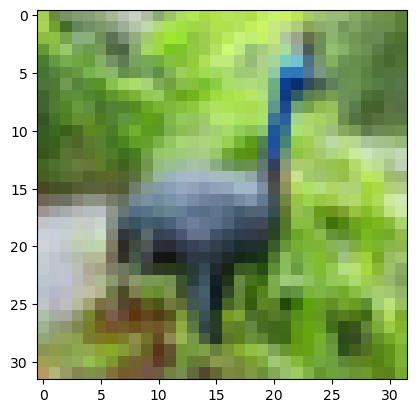

In [22]:
# Check an image from data set:

import matplotlib.pyplot as plt
plt.imshow(x_train[6])
plt.show()

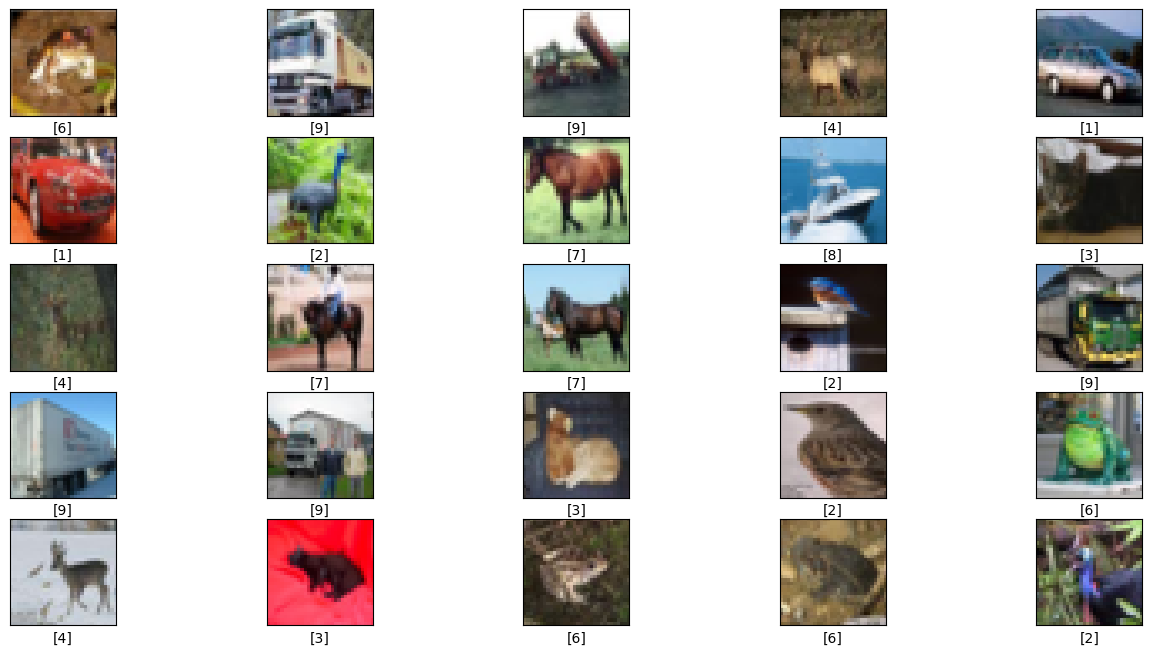

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])

plt.show()

In [24]:
# Feature Scalling:

x_train = x_train/255.0
x_test = x_test/255.0

In [25]:
x_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

- In previous plot We are getting number instead of the actual class label because 
y_train[i] contains numerical labels (0–9) rather than their corresponding class 
names. 

- In official CIFAR-10 label mapping IN KERAS website & The class names are 
indexed based on the label value so we will make it as class

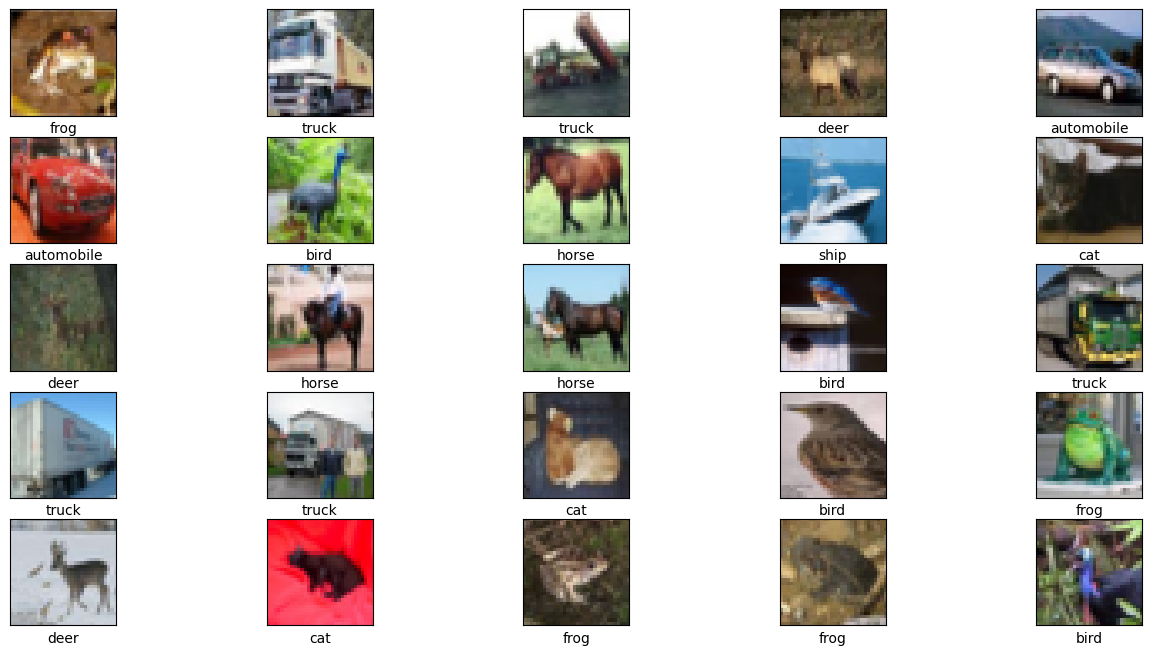

In [26]:
# Convert Labels to Class Names - X & Y train
class_names = ['airplane', 'automobile', 'bird', 'cat', 
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(16, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [27]:
# Check lebelling:
print(y_train[:25])

[[6]
 [9]
 [9]
 [4]
 [1]
 [1]
 [2]
 [7]
 [8]
 [3]
 [4]
 [7]
 [7]
 [2]
 [9]
 [9]
 [9]
 [3]
 [2]
 [6]
 [4]
 [3]
 [6]
 [6]
 [2]]


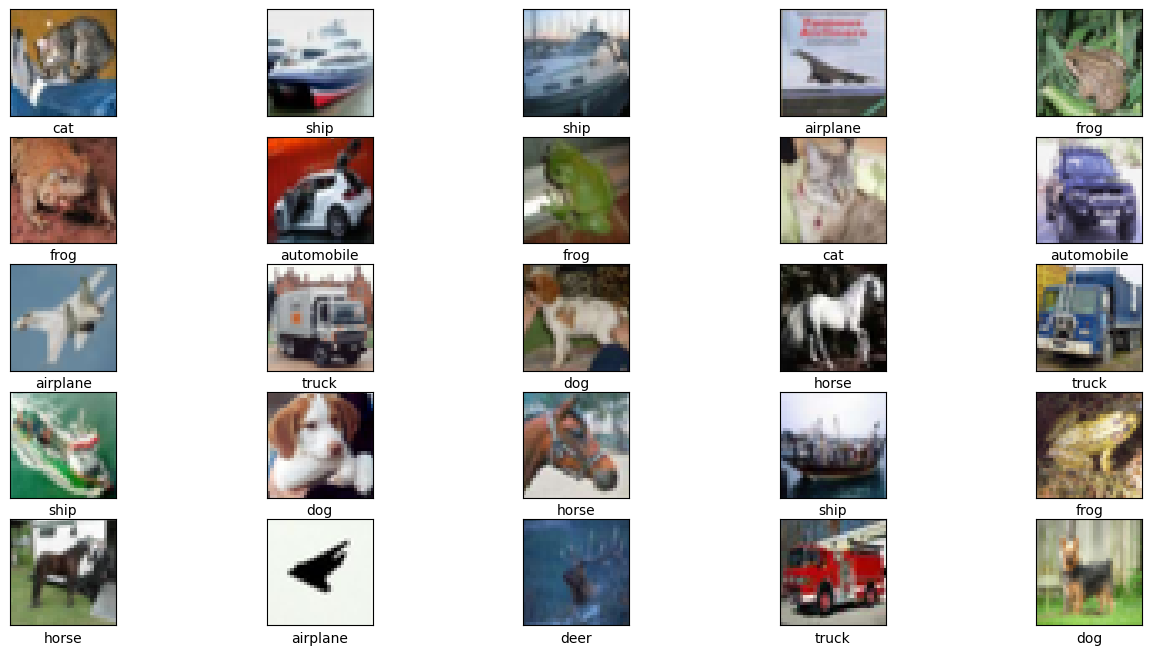

In [11]:
# Convert Labels to Class Names - X & Y Test
class_names = ['airplane', 'automobile', 'bird', 'cat', 
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(16, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(True)
    plt.imshow(x_test[i])
    plt.xlabel(class_names[y_test[i][0]])
plt.show()

In [12]:
print(y_test[:25])

[[3]
 [8]
 [8]
 [0]
 [6]
 [6]
 [1]
 [6]
 [3]
 [1]
 [0]
 [9]
 [5]
 [7]
 [9]
 [8]
 [5]
 [7]
 [8]
 [6]
 [7]
 [0]
 [4]
 [9]
 [5]]


In [28]:
# Convert Labels to One-Hot Encoding

from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [29]:
print("Y_train shape after encoding:", y_train.shape)
print("Y_test shape after encoding:", y_test.shape)

Y_train shape after encoding: (50000, 10)
Y_test shape after encoding: (10000, 10)


In [30]:
print("x_train shape :", x_train.shape)
print("x_test shape :", x_test.shape)
print("Y_train shape :", y_train.shape)
print("Y_test shape:", y_test.shape)

x_train shape : (50000, 32, 32, 3)
x_test shape : (10000, 32, 32, 3)
Y_train shape : (50000, 10)
Y_test shape: (10000, 10)


dataset is now correctly preprocessed for training a deep learning model and ready for model training

# Model Building: Building Multi Layer Perceptron Model:

In [16]:
! pip install keras-tuner --upgrade

Using Hyperparameter Tuning, we will dynamically build the model so that the machine can choose the optimal parameters, such as the number of hidden layers, the required number of neurons, the activation function, the dropout percentage, and the batch size. We will define a function and then use the Keras Tuner library to find the best configuration.

In [48]:
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.regularizers import l2
import keras_tuner as kt
from kerastuner.tuners import *
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.layers import LeakyReLU

In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Flatten(input_shape=(32, 32, 3)))  # Converts 3D image into 1D for MLP
    
    for i in range(hp.Int('num_layers', min_value=1, max_value=5)): 
        units = hp.Int(f'num_neurons_{i}', min_value=32, max_value=512, step=32)  
        activation = hp.Choice(f'activation_{i}', ['relu', 'sigmoid', 'tanh', 'leakyrelu'])
        
        # Adding Dense Layer
        if activation == 'leakyrelu':  
            model.add(Dense(units, kernel_initializer=hp.Choice(f'kernel_initializer_{i}', 
                                                                ['he_uniform', 'glorot_uniform']),
                            kernel_regularizer=l2(0.001)))
            model.add(LeakyReLU(alpha=0.01))  
        else:
            model.add(Dense(units, activation=activation, 
                            kernel_initializer=hp.Choice(f'kernel_initializer_{i}', 
                                                         ['he_uniform', 'glorot_uniform']),
                            kernel_regularizer=l2(0.001)))

        model.add(BatchNormalization())
        model.add(Dropout(hp.Choice(f'dropout_{i}', values=[0.1, 0.2, 0.3, 0.4, 0.5])))

    model.add(Dense(10, activation='softmax'))  # Output layer for 10 classes

    # Optimizer Selection
    optimizer_choice = hp.Choice('optimizer', ['adam', 'rmsprop', 'sgd'])
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')
   #The learning rate is a floating-point number between 0.0001 and 0.01
    optimizers = {
        'adam': Adam(learning_rate=learning_rate),
        'rmsprop': RMSprop(learning_rate=learning_rate),
        'sgd': SGD(learning_rate=learning_rate, momentum=0.9)
    }
    
    model.compile(optimizer=optimizers[optimizer_choice], 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])

    return model

In [51]:
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=0.01,
    restore_best_weights=True,
    verbose=1
)

In [52]:
# Initialize Keras Tuner for 20 trails
tuner = kt.RandomSearch(
    build_model, 
    objective='val_accuracy',  
    max_trials=20,  
    executions_per_trial=1, 
    directory='tuner_results',
    project_name='dnn_tuning_early_stop'
)

Reloading Tuner from tuner_results/dnn_tuning_early_stop/tuner0.json


In [53]:
# Start tuning
tuner.search(
    x_train, y_train,
    epochs=100,  
    validation_data=(x_test, y_test),
    callbacks=[early_stopping]
)

Trial 20 Complete [00h 00m 33s]
val_accuracy: 0.2955000102519989

Best val_accuracy So Far: 0.5077999830245972
Total elapsed time: 01h 17m 45s


In [55]:
tuner.get_trial_dir

<bound method BaseTuner.get_trial_dir of <keras_tuner.src.tuners.randomsearch.RandomSearch object at 0x3059a8f90>>

In [58]:
best_hp_values = tuner.get_best_hyperparameters()[0].values
best_hp_values

{'num_layers': 1,
 'num_neurons_0': 288,
 'activation_0': 'tanh',
 'kernel_initializer_0': 'glorot_uniform',
 'dropout_0': 0.3,
 'optimizer': 'sgd',
 'learning_rate': 0.00023934916758165718,
 'num_neurons_1': 160,
 'activation_1': 'tanh',
 'kernel_initializer_1': 'glorot_uniform',
 'dropout_1': 0.4,
 'num_neurons_2': 384,
 'activation_2': 'relu',
 'kernel_initializer_2': 'glorot_uniform',
 'dropout_2': 0.2,
 'num_neurons_3': 352,
 'activation_3': 'leakyrelu',
 'kernel_initializer_3': 'he_uniform',
 'dropout_3': 0.4}

In [59]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 288)            │       885,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 288)            │         1,152 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 288)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,890 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 889,066 (3.39 MB)

 Trainable params: 888,490 (3.39 MB)

 Non-trainable params: 576 (2.25 KB)

In [60]:
from tensorflow.keras.callbacks import *

reduce_lr = ReduceLROnPlateau( monitor='val_loss',
                              factor=0.5,   
                              patience=5, 
                              min_lr=1e-6)

In [61]:
early_stopping_history = EarlyStopping(
    monitor='val_loss',
    patience=10,
    min_delta=0.001, #change from 0.01 to 0.001
    restore_best_weights=True,
    verbose=1)

In [63]:
history = best_model.fit(
    x_train, y_train,
    batch_size=32,
    epochs=200,
    initial_epoch=100,
    validation_data=(x_test, y_test),
    callbacks=[early_stopping_history,reduce_lr])

Epoch 101/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5312 - loss: 1.5193 - val_accuracy: 0.5043 - val_loss: 1.5864 - learning_rate: 2.3935e-04
Epoch 102/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5312 - loss: 1.5266 - val_accuracy: 0.5161 - val_loss: 1.5738 - learning_rate: 2.3935e-04
Epoch 103/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5368 - loss: 1.5058 - val_accuracy: 0.5209 - val_loss: 1.5612 - learning_rate: 2.3935e-04
Epoch 104/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5380 - loss: 1.5017 - val_accuracy: 0.5112 - val_loss: 1.5759 - learning_rate: 2.3935e-04
Epoch 105/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5368 - loss: 1.5025 - val_accuracy: 0.4886 - val_loss: 1.6124 - learning_rate: 2.3935e-04
Epoch 106/200
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5340 - loss: 1.5090 - val_accuracy: 0.5184 - val_loss: 1.5524 - learning_rate: 2.3935e-04
Epoch 107/200
1563/1563 ━━━━━━━━━━

- The model started with an accuracy of 53.1% and gradually improved.
- Loss values decreased steadily, indicating better optimization over epochs.
- Validation accuracy fluctuated but showed an upward trend, reaching ~52.2% by epoch 130.
- Learning rate decayed gradually, helping to stabilize training.

- Model's validation accuracy is fluctuating around 50-52%, which suggests that it may not be learning complex patterns effectively.
- Hence Without convolutional layers, DNNs struggle to provide accuracy.

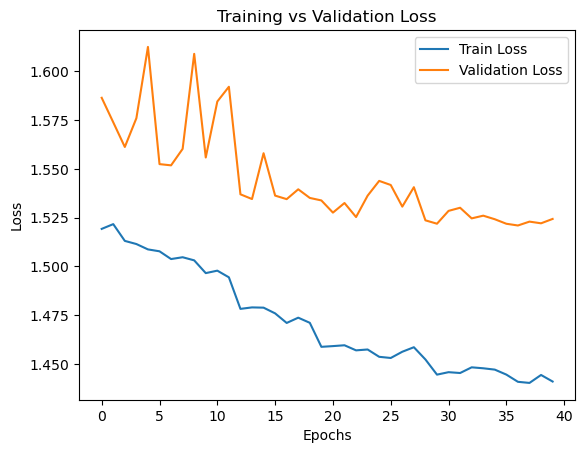

In [64]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training vs Validation Loss")
plt.show()


- Both losses are steadily decreasing , it means the model is learning patterns from the data correctly.
and they are close to each other without a large gap, there is no overfitting.
- Model works fine but DNN not suitable for CIFAR 10 Image classifier should focous on CNN which will be a great model for this case.

In [67]:
# evaluates the trained model on the test dataset

test_loss, test_acc = best_model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4%}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 868us/step - accuracy: 0.5237 - loss: 1.5084
Test Loss: 1.5219, Test Accuracy: 52.1700%


- Moderate accuracy (52%): The model is slightly better than random guessing 
    (which would be 50% for a binary classification problem).
- High loss (1.52): The model's predictions are still quite uncertain.

In [72]:
# Saving the model-

best_model.save("cifar10_model.keras") 